Your employer noticed a recent trend in the accessory industry towards zodiac-themed jewelry, and would like to add something new to the market. After a bit of research, the team discovered that the day of the week that you are born actually corresponds to a visible celestial body. They decide to create a ring associated with each birth day.

Further Instructions
The thing is, they need your help to figure out how many rings for each day of the week to make! Are there more people born on a Monday? Will there, therefore, be a greater demand for moon rings? Who knows! Luckily, you have access to birth data in the United States.

Based on this document, you will need to figure out the number of births for each day of the week from 1960-1989. 

This task involves a little bit of data cleaning and a little bit of linear algebra. You will also need to process the  to_datetime  function in order to transform data into  datetime objects.

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DELIVERABLE:

A graph with three curves that represent the number of births for each day of the week for the 1960s, 1970s and 1980s.

In [105]:
url ="https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"
births = pd.read_csv(url)
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [106]:
birth = births.dropna()
birth.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [107]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [108]:
births['decade'] = 10 * (birth['year'] // 10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960.0
1,1969,1,1.0,M,4440,1960.0
2,1969,1,2.0,F,4454,1960.0
3,1969,1,2.0,M,4548,1960.0
4,1969,1,3.0,F,4548,1960.0


In [109]:
len(births.index)

15547

In [110]:
births.shape[0]

15547

In [111]:
births.shape[1]

6

In [112]:
births['day'] = birth['day'].astype(int)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960.0
1,1969,1,1.0,M,4440,1960.0
2,1969,1,2.0,F,4454,1960.0
3,1969,1,2.0,M,4548,1960.0
4,1969,1,3.0,F,4548,1960.0


In [113]:
display(births.dtypes)

year        int64
month       int64
day       float64
gender     object
births      int64
decade    float64
dtype: object

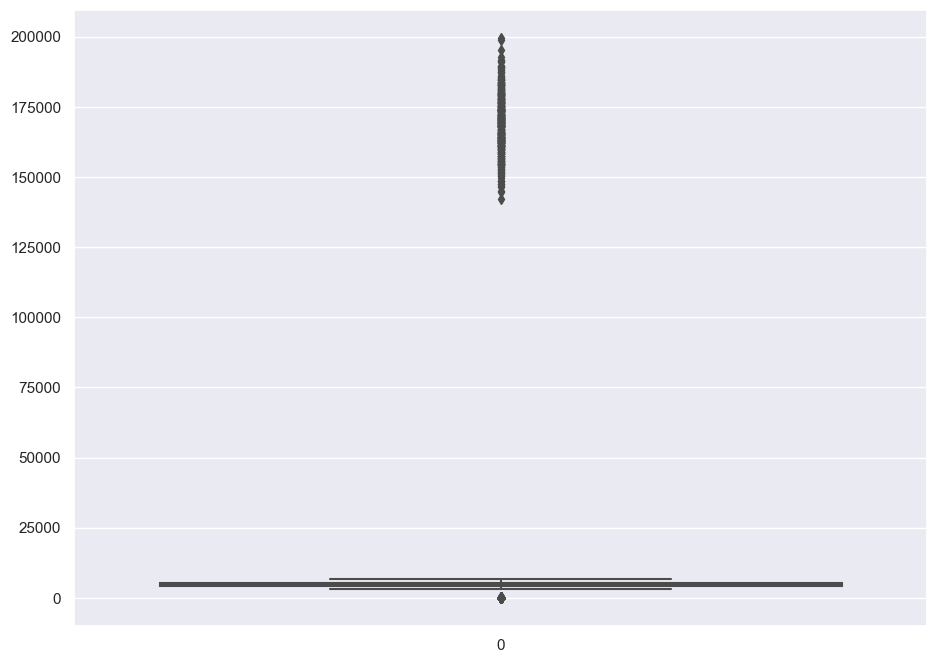

In [114]:
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)

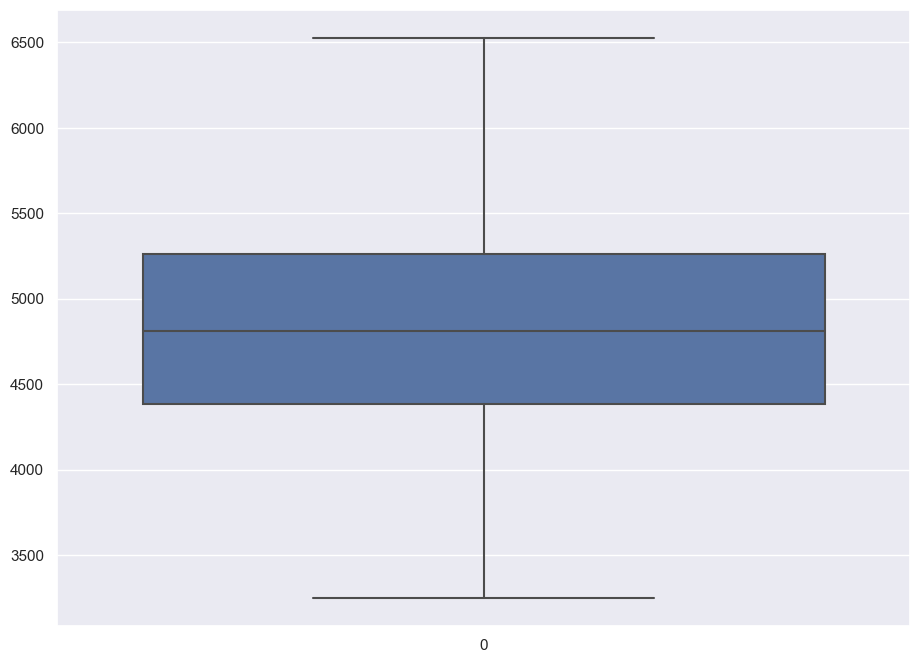

In [115]:
births = births.query('(births > 1000) & (births < 10000)')
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)

In [116]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ MB


In [117]:
for field in ["day", "month","year"]:
    births[field] = births[field].astype(int)

extracting day of the week.

In [118]:
births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960.0,2
1969-01-01,1969,1,1,M,4440,1960.0,2
1969-01-02,1969,1,2,F,4454,1960.0,3
1969-01-02,1969,1,2,M,4548,1960.0,3
1969-01-03,1969,1,3,F,4548,1960.0,4


And finally, number of births per day.

C:\Users\vtest\AppData\Local\Temp\ipykernel_17100\777621826.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


<Figure size 1100x800 with 0 Axes>

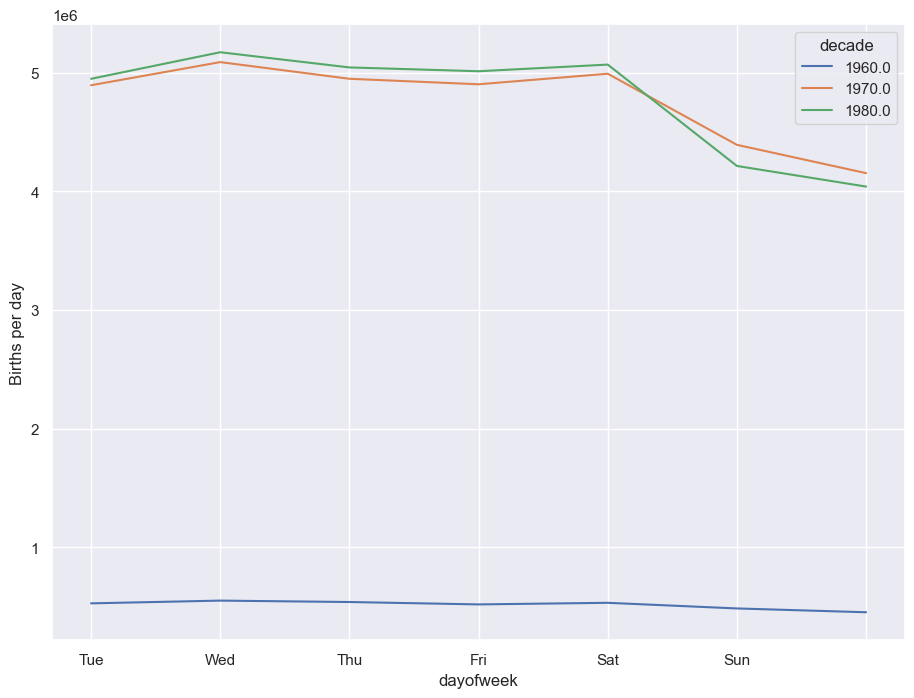

In [119]:
fig = plt.figure(figsize=(11,8))
births_per_day = births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='sum')
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day');

This part is optional. The low number of births in the 1960s is most likely due to missing data
in your dataset. You cannot do anything about this, but it probably makes more sense to have a
look at the average number of births:

C:\Users\vtest\AppData\Local\Temp\ipykernel_17100\404862976.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


<Figure size 1100x800 with 0 Axes>

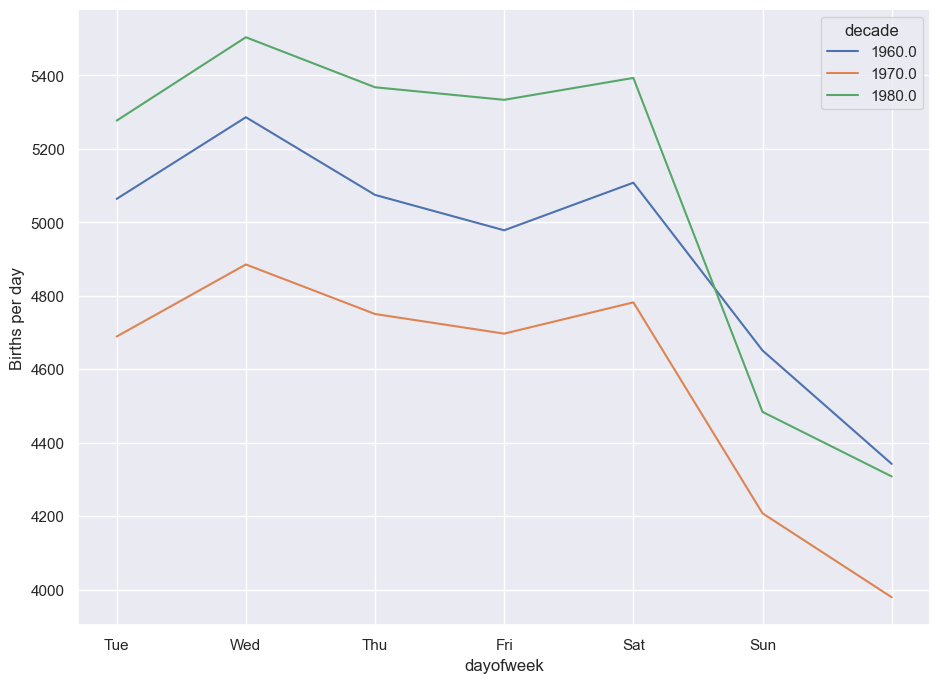

In [120]:
fig = plt.figure(figsize=(11,8))
births_per_day = births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean')
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day');